# Decision Tree

In [23]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

## Uploading the data 

In [24]:
irisData = datasets.load_iris()
df = pd.DataFrame(irisData.data, columns = irisData.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualization for the data

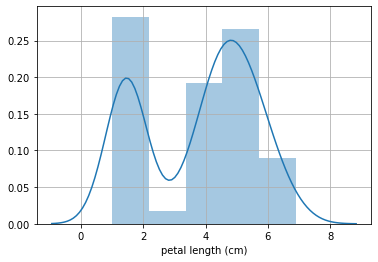

In [26]:
import seaborn as sns
sns.distplot(df['petal length (cm)'])
plt.grid(True)
plt.show()

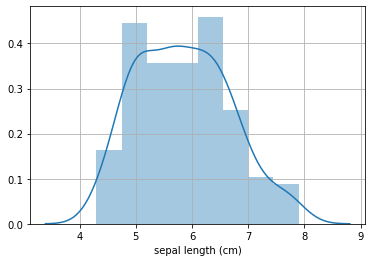

In [27]:
import seaborn as sns
sns.distplot(df['sepal length (cm)'])
plt.grid(True)
plt.show()

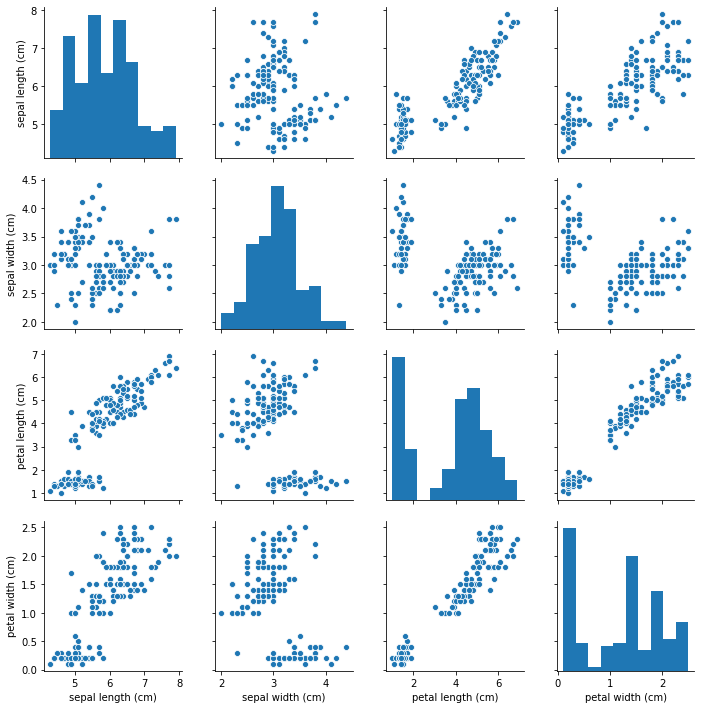

In [28]:
sns.pairplot(df)

## Training the data

In [29]:
X = df[[ 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal length (cm)']].values
X[0:10]

array([[5.1, 3.5, 1.4, 1.4],
       [4.9, 3. , 1.4, 1.4],
       [4.7, 3.2, 1.3, 1.3],
       [4.6, 3.1, 1.5, 1.5],
       [5. , 3.6, 1.4, 1.4],
       [5.4, 3.9, 1.7, 1.7],
       [4.6, 3.4, 1.4, 1.4],
       [5. , 3.4, 1.5, 1.5],
       [4.4, 2.9, 1.4, 1.4],
       [4.9, 3.1, 1.5, 1.5]])

In [30]:
y= irisData.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [31]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [32]:
X_trainset.shape

(105, 4)

In [33]:
X_testset.shape

(45, 4)

In [34]:
y_trainset.shape

(105,)

In [35]:
y_testset.shape

(45,)

In [36]:
decisiontree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisiontree 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
asd = decisiontree.fit(df,y)

In [38]:
predTree = decisiontree.predict(X_testset)


In [39]:
print (predTree [0:10])
print (y_testset [0:10])

[0 0 0 0 0 2 1 0 2 2]
[0 0 0 0 0 2 1 0 2 1]


In [40]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8444444444444444


In [42]:
!pip install pydotplus
!pip install GraphViz

In [43]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn.tree import export_graphviz
import matplotlib.image as mpimg
from sklearn import tree
from IPython.display import Image 
import pydotplus
pd.plotting.register_matplotlib_converters()
%matplotlib inline 

In [44]:
import graphviz 

dot_data = tree.export_graphviz(asd, out_file=None) 

graph = graphviz.Source(dot_data)
filename="des.png"

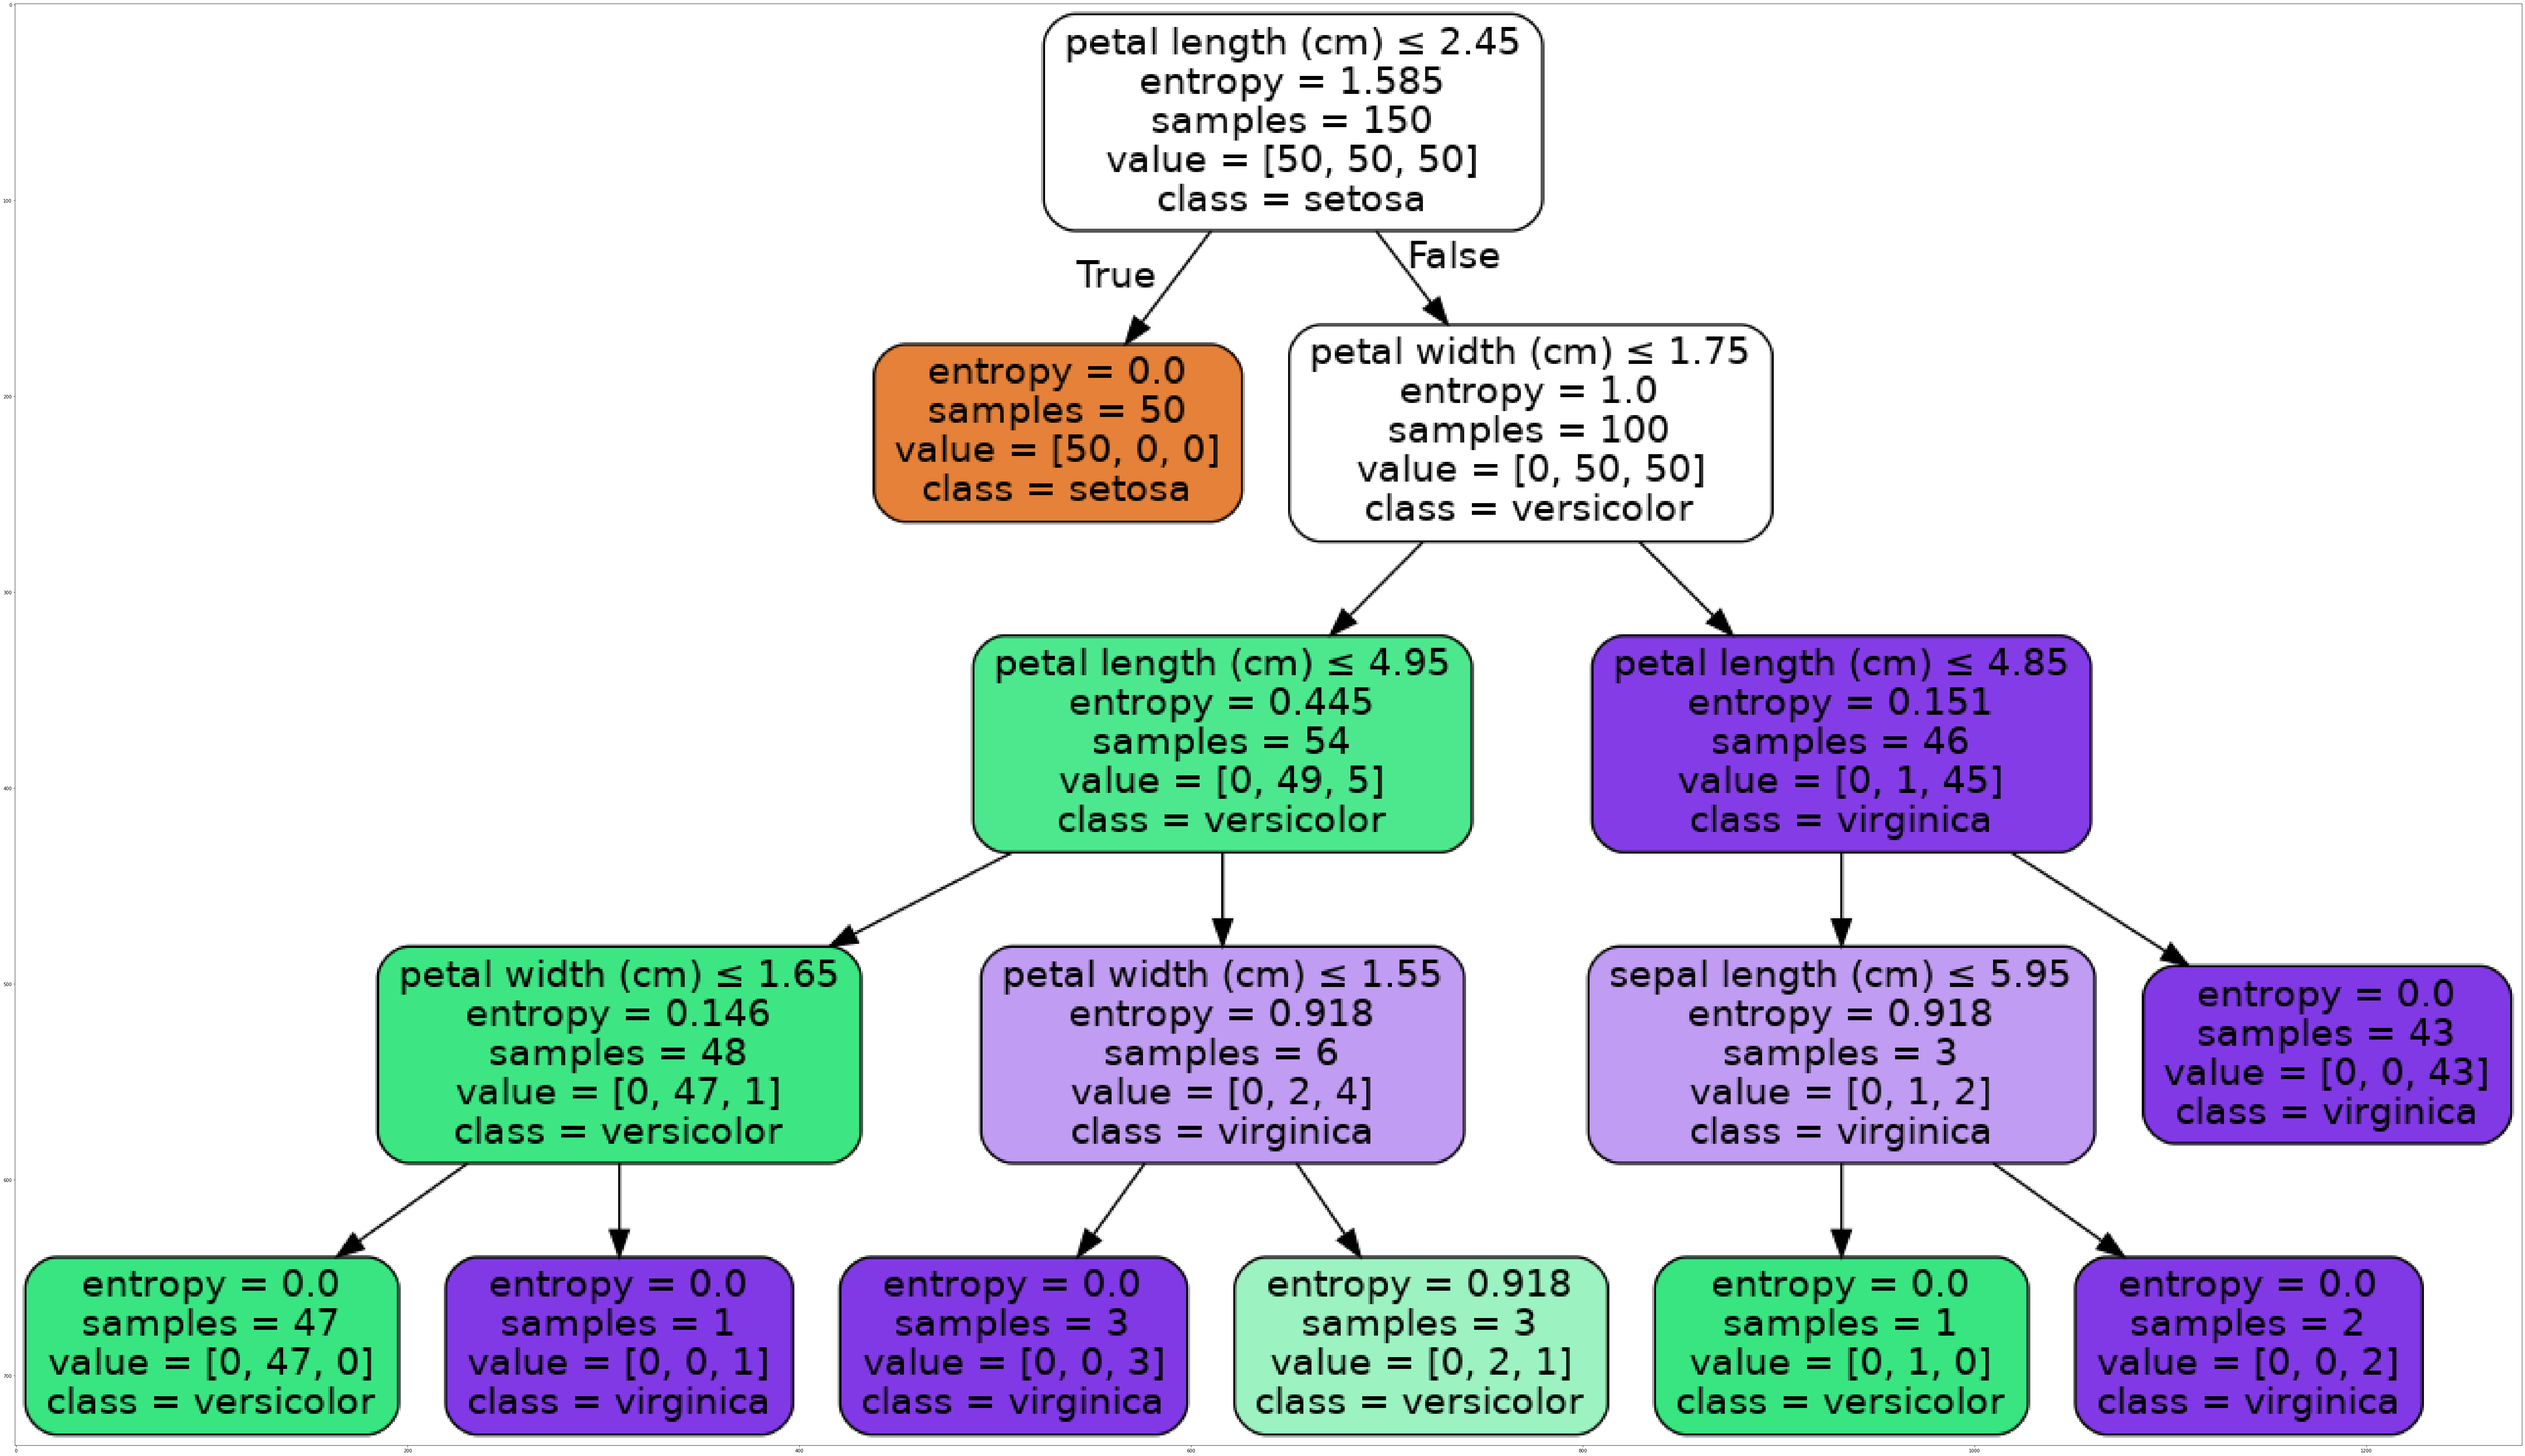

In [45]:

dot_data = tree.export_graphviz(asd, out_file=None, 
                      feature_names=irisData.feature_names,  
                      class_names=irisData.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
